1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step


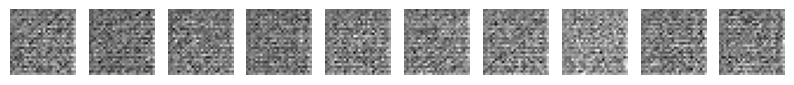

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Define the VAE model
latent_dim = 64

# Encoder
encoder_inputs = tf.keras.Input(shape=(28, 28, 1))
x = tf.keras.layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = tf.keras.layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(latent_dim)(x)  # Change here: reduce the output dimension
z_mean = x
z_log_var = tf.keras.layers.Dense(latent_dim)(x)
encoder = tf.keras.Model(encoder_inputs, [z_mean, z_log_var], name="encoder")

# Reparameterization trick
def sampling(args):
    z_mean, z_log_var = args
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = tf.keras.layers.Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# Decoder
latent_inputs = tf.keras.Input(shape=(latent_dim,))
x = tf.keras.layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
x = tf.keras.layers.Reshape((7, 7, 64))(x)
x = tf.keras.layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = tf.keras.layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = tf.keras.layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder = tf.keras.Model(latent_inputs, decoder_outputs, name="decoder")

# VAE
vae_outputs = decoder(z)
vae = tf.keras.Model(encoder_inputs, vae_outputs, name="vae")

# Generate new images
num_samples = 10
random_latents = np.random.normal(size=(num_samples, latent_dim))
generated_images = decoder.predict(random_latents)

# Display the generated images
fig, axes = plt.subplots(1, num_samples, figsize=(10, 10))
for i, ax in enumerate(axes):
    ax.imshow(generated_images[i].reshape(28, 28), cmap="gray")
    ax.axis("off")

plt.show()